## Libraries

In [1]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from collections import Counter
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import plotly.express as px
import xgboost as xgb

import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [2]:
from fast_ml.model_development import train_valid_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
#from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction import FeatureHasher
from sklearn.feature_extraction import FeatureHasher
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import requests
from bs4 import BeautifulSoup
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [4]:
#!pip install fast-ml

## Take a first look at the data

In [5]:
cin = pd.read_csv('cin_prep.csv')

In [6]:
cin.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,movie_description,genres_split
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,237000000.0,2009.0,936.0,7.9,1.78,33000,4,0,A paraplegic Marine dispatched to the moon Pan...,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']"
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,300000000.0,2007.0,5000.0,7.1,2.35,0,8,0,"Captain Barbossa, Will Turner and Elizabeth Sw...","['Action', 'Adventure', 'Fantasy']"
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,245000000.0,2015.0,393.0,6.8,2.35,85000,1,0,A cryptic message from James Bond's past sends...,"['Action', 'Adventure', 'Thriller']"
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,250000000.0,2012.0,23000.0,8.5,2.35,164000,3,0,"Eight years after the Joker's reign of chaos, ...","['Action', 'Thriller']"
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,263700000.0,2012.0,632.0,6.6,2.35,24000,3,0,"Transported to Barsoom, a Civil War vet discov...","['Action', 'Adventure', 'Sci-Fi']"


In [7]:
cin.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'war_symb_title',
       'point_symb_title', 'movie_description', 'genres_split'],
      dtype='object')

In [54]:
cin.shape

(4117, 32)

# Let's drop columns that we won't use now

In [8]:
df = cin

In [9]:
df = df.drop(['aspect_ratio'], axis=1)

In [10]:
df = df.drop(['genres_split'], axis=1)

In [11]:
df = df.drop(['point_symb_title'], axis=1)

In [12]:
df = df.drop(['movie_imdb_link'], axis=1)

In [13]:
df = df.drop(['war_symb_title'], axis=1)

In [14]:
df = df.drop(['movie_description'], axis=1)

In [15]:
df = df.drop(['facenumber_in_poster'], axis=1)

In [16]:
df = df.drop(['actor_2_name'], axis=1)

In [17]:
df = df.drop(['movie_title'], axis=1)

In [18]:
df = df.drop(['actor_3_name'], axis=1)

In [19]:
df = df.drop(['plot_keywords'], axis=1)

# Let's split our data in train, test, val sets

In [20]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target = 'gross', 
                                                                            method='sorted', sort_by_col='gross',
                                                                            train_size=0.8, valid_size=0.1, 
                                                                            test_size=0.1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(3293, 20)
(3293,)
(411, 20)
(411,)
(413, 20)
(413,)


(None, None)

## Now we will work only with train set. Let's do encoding

In [21]:
X_train.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
3039,Color,Ekachai Uekrongtham,66.0,96.0,3.0,305.0,2000.0,Action|Crime|Thriller,Michael Jai White,5228,2802,38,English,Thailand,R,9.000000e+06,2014.0,368.0,5.7,0
3903,Color,Frank Whaley,9.0,96.0,436.0,4.0,474.0,Comedy|Drama,Lynn Cohen,480,920,21,English,USA,R,1.500000e+06,2001.0,436.0,5.4,47
3902,Color,Brian Trenchard-Smith,8.0,88.0,53.0,176.0,563.0,Action|Drama,David Keith,783,1284,12,English,Germany,R,1.000000e+06,2006.0,288.0,4.1,42
3429,Color,Robert Sarkies,43.0,100.0,0.0,3.0,109.0,Crime|Drama,William Kircher,2776,122,22,English,New Zealand,R,9.805805e+07,2006.0,10.0,7.3,285
3213,Color,Ian Fitzgibbon,54.0,88.0,11.0,415.0,1000.0,Action|Comedy|Crime|Drama|Romance|Thriller,Jim Broadbent,5133,2728,31,English,Ireland,R,4.103382e+07,2009.0,418.0,6.4,663


---

In [22]:
X_train['color_ohe'] = (X_train['color'] == 'Color').astype(int)
X_train['language_ohe'] = (X_train['language'] == 'English').astype(int)
X_train['is_USA'] = (X_train['country'] == 'USA').astype(int)

In [23]:
X_valid['color_ohe'] = (X_valid['color'] == 'Color').astype(int)
X_valid['language_ohe'] = (X_valid['language'] == 'English').astype(int)
X_valid['is_USA'] = (X_valid['country'] == 'USA').astype(int)

In [24]:
X_test['color_ohe'] = (X_test['color'] == 'Color').astype(int)
X_test['language_ohe'] = (X_test['language'] == 'English').astype(int)
X_test['is_USA'] = (X_test['country'] == 'USA').astype(int)

In [25]:
genres_splitted = X_train['genres'].str.split('|')
unique_genres = list(set([g for l_g in genres_splitted for g in l_g ]))
len(unique_genres)

24

In [26]:
genres_frequency = {}
for g in unique_genres:
    n_times = genres_splitted.apply(lambda v: g in v).sum()
    genres_frequency[g] = n_times

In [27]:
selected_genres = [g for g in genres_frequency if genres_frequency[g] > 300]
selected_genres

['Adventure',
 'Sci-Fi',
 'Mystery',
 'Fantasy',
 'Action',
 'Horror',
 'Crime',
 'Comedy',
 'Romance',
 'Thriller',
 'Drama']

In [28]:
train_genres = pd.DataFrame(columns=selected_genres)
for g in selected_genres:
    train_genres[g] = genres_splitted.apply(lambda v: g in v).astype(int)

train_genres

,Adventure,Sci-Fi,Mystery,Fantasy,Action,Horror,Crime,Comedy,Romance,Thriller,Drama
3039,0,0,0,0,1,0,1,0,0,1,0
3903,0,0,0,0,0,0,0,1,0,0,1
3902,0,0,0,0,1,0,0,0,0,0,1
3429,0,0,0,0,0,0,1,0,0,0,1
3213,0,0,0,0,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
691,0,0,0,0,1,0,1,1,0,1,1
1928,1,1,0,0,0,1,0,1,0,0,0
1961,0,0,0,0,0,0,0,0,0,0,1
548,0,0,0,0,0,0,0,0,0,0,1


In [29]:
X_train = pd.concat([X_train, train_genres], axis=1)

---

In [30]:
genres_splitted = X_valid['genres'].str.split('|')

valid_genres = pd.DataFrame(columns=selected_genres)
for g in selected_genres:
    valid_genres[g] = genres_splitted.apply(lambda v: g in v).astype(int)

X_valid = pd.concat([X_valid, valid_genres], axis=1)

---

In [31]:
genres_splitted = X_test['genres'].str.split('|')

test_genres = pd.DataFrame(columns=selected_genres)
for g in selected_genres:
    test_genres[g] = genres_splitted.apply(lambda v: g in v).astype(int)

test_genres

,Adventure,Sci-Fi,Mystery,Fantasy,Action,Horror,Crime,Comedy,Romance,Thriller,Drama
1139,0,0,0,0,1,0,0,0,0,1,1
347,1,0,0,0,1,0,1,1,0,1,0
43,1,1,0,0,1,0,0,0,0,0,0
242,1,0,0,0,1,0,0,0,0,1,0
244,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,0,1,0,1,0,0,1,1
16,1,1,0,0,1,0,0,0,0,0,0
28,1,1,0,0,1,0,0,0,0,1,0
25,0,0,0,0,0,0,0,0,1,0,1


In [32]:
X_test = pd.concat([X_test, test_genres], axis=1)

---

In [33]:
scaler = StandardScaler()

In [34]:
scaler.fit(X_train[["budget"]])

StandardScaler()

In [35]:
X_train["budget_normalized"] = scaler.transform(X_train[["budget"]])
X_test["budget_normalized"] = scaler.transform(X_test[["budget"]])
X_valid["budget_normalized"] = scaler.transform(X_valid[["budget"]])

In [36]:
features = ['color_ohe', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 
            'cast_total_facebook_likes', 'language_ohe', 'is_USA', 'budget_normalized', 'title_year', 'imdb_score',
           *selected_genres]

---

In [37]:
scaler.fit(y_train.values.reshape(-1, 1))

StandardScaler()

In [38]:
y_train_normalized = scaler.transform(y_train.values.reshape(-1, 1))
y_test_normalized = scaler.transform(y_test.values.reshape(-1, 1))
y_valid_normalized = scaler.transform(y_valid.values.reshape(-1, 1))

---

1. Scale gross (1 std 0 mean)
2. no longer work with MAPE -> use MSE (MAE)

In [39]:
rf_model = RandomForestRegressor(n_estimators=1, min_samples_split=10) 
rf_model.fit(X_train[features], y_train_normalized)

RandomForestRegressor(min_samples_split=10, n_estimators=1)

In [40]:
for feature, score in zip(features, rf_model.feature_importances_):
    print(feature, score)

color_ohe 0.0
num_critic_for_reviews 0.1471545195698841
duration 0.0658087696820369
director_facebook_likes 0.07410692077921698
cast_total_facebook_likes 0.10115462029316005
language_ohe 0.02186830059192911
is_USA 0.07900396606592766
budget_normalized 0.2740698856872589
title_year 0.09559412126419116
imdb_score 0.08404408553066602
Adventure 0.0024456469332022122
Sci-Fi 0.010136855212431791
Mystery 0.0026358173457964027
Fantasy 0.0
Action 0.000803259851062632
Horror 6.69843985390717e-05
Crime 0.006946722589760057
Comedy 0.016487733764873874
Romance 0.0023655431148608417
Thriller 0.0005556860424273636
Drama 0.01475056128277501


In [41]:
predictions = rf_model.predict(X_train[features])
mse = mean_squared_error(y_train_normalized, predictions)
mae = mean_absolute_error(y_train_normalized, predictions)
mape = mean_absolute_percentage_error(y_train_normalized, predictions)
r2 = r2_score(y_train_normalized, predictions)

mse, mae, mape, r2

(0.5015742019441553,
 0.4532085138791801,
 1.512721692463593,
 0.49842579805584486)

In [42]:
df = pd.DataFrame.from_dict({
    'y_train': y_train_normalized.flatten(),
    'pred': predictions.flatten(),
    'diff': predictions.flatten() - y_train_normalized.flatten()
})

df['diff_abs'] = df['diff'].abs()

<Axes: xlabel='y_train', ylabel='diff_abs'>

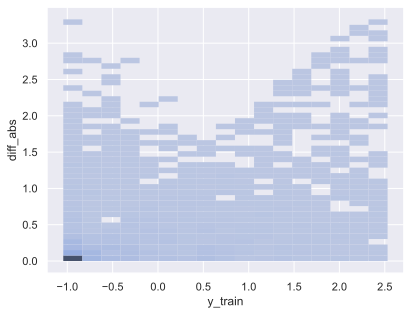

In [43]:
sns.histplot(df, x='y_train', y='diff_abs')

In [44]:
predictions = rf_model.predict(X_valid[features])
mse = mean_squared_error(y_valid_normalized, predictions)
mae = mean_absolute_error(y_valid_normalized, predictions)
mape = mean_absolute_percentage_error(y_valid_normalized, predictions)
r2 = r2_score(y_valid_normalized, predictions)

mse, mae, mape, r2

(8.113304187694286,
 2.6270560941639745,
 0.7398833748303753,
 -16.534786449373136)

In [45]:
predictions = rf_model.predict(X_test[features])
mse = mean_squared_error(y_test_normalized, predictions)
mae = mean_absolute_error(y_test_normalized, predictions)
mape = mean_absolute_percentage_error(y_test_normalized, predictions)
r2 = r2_score(y_test_normalized, predictions)

mse, mae, mape, r2

(79.43302517848451, 7.81365051292816, 0.8616101809817467, -3.301923977872166)

----

In [46]:
lr_model = LinearRegression()
lr_model.fit(X_train[features], y_train_normalized)

LinearRegression()

In [47]:
predictions = lr_model.predict(X_train[features])
mse = mean_squared_error(y_train_normalized, predictions)
mae = mean_absolute_error(y_train_normalized, predictions)
mape = mean_absolute_percentage_error(y_train_normalized, predictions)
r2 = r2_score(y_train_normalized, predictions)

mse, mae, mape, r2

(0.7412092137437033, 0.6897460506918579, 1.429824451163204, 0.2587907862562969)

In [48]:
predictions = lr_model.predict(X_valid[features])
mse = mean_squared_error(y_valid_normalized, predictions)
mae = mean_absolute_error(y_valid_normalized, predictions)
mape = mean_absolute_percentage_error(y_valid_normalized, predictions)
r2 = r2_score(y_valid_normalized, predictions)

mse, mae, mape, r2

(9.596298859644117, 2.9892445951316233, 0.8426959395765632, -19.73989182649428)

In [49]:
predictions = lr_model.predict(X_test[features])
mse = mean_squared_error(y_test_normalized, predictions)
mae = mean_absolute_error(y_test_normalized, predictions)
mape = mean_absolute_percentage_error(y_test_normalized, predictions)
r2 = r2_score(y_test_normalized, predictions)

mse, mae, mape, r2

(78.79219842232558, 7.908554132985284, 0.8826070353787667, -3.267218161471649)

----

In [50]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train[features], y_train_normalized)

GradientBoostingRegressor()

In [51]:
predictions = gb_model.predict(X_train[features])
mse = mean_squared_error(y_train_normalized, predictions)
mae = mean_absolute_error(y_train_normalized, predictions)
mape = mean_absolute_percentage_error(y_train_normalized, predictions)
r2 = r2_score(y_train_normalized, predictions)

mse, mae, mape, r2

(0.4771048631550192, 0.5332512587037043, 1.335912542783414, 0.5228951368449809)

In [52]:
predictions = gb_model.predict(X_valid[features])
mse = mean_squared_error(y_valid_normalized, predictions)
mae = mean_absolute_error(y_valid_normalized, predictions)
mape = mean_absolute_percentage_error(y_valid_normalized, predictions)
r2 = r2_score(y_valid_normalized, predictions)

mse, mae, mape, r2

(8.06151080484459, 2.7296333461137494, 0.7674301193825258, -16.422848589439628)

In [53]:
predictions = gb_model.predict(X_test[features])
mse = mean_squared_error(y_test_normalized, predictions)
mae = mean_absolute_error(y_test_normalized, predictions)
mape = mean_absolute_percentage_error(y_test_normalized, predictions)
r2 = r2_score(y_test_normalized, predictions)

mse, mae, mape, r2

(76.94650560879026, 7.738771836126316, 0.8557665160788641, -3.16725935778146)

----

In [56]:
model_names = ['RandomForestRegressor', 'LinearRegression', 'GradientBoostingRegressor']
mse_scores_train_df = [0.5015742019441553, 0.7412092137437033, 0.4771048631550192]
mae_scores_train_df = [0.4532085138791801, 0.6897460506918579, 0.5332512587037043]
mape_scores_train_df = [1.512721692463593, 1.429824451163204, 1.335912542783414]
r2_scores_train_df = [0.49842579805584486, 0.2587907862562969, 0.5228951368449809]

mse_scores_valid_df = [8.113304187694286, 9.596298859644117, 8.06151080484459]
mae_scores_valid_df = [2.6270560941639745, 2.9892445951316233, 2.7296333461137494]
mape_scores_valid_df = [0.7398833748303753, 0.8426959395765632, 0.7674301193825258]
r2_scores_valid_df = [-16.534786449373136, -19.73989182649428, -16.422848589439628]

mse_scores_test_df = [79.43302517848451, 78.79219842232558, 76.94650560879026]
mae_scores_test_df = [7.81365051292816, 7.908554132985284, 7.738771836126316]
mape_scores_test_df = [0.8616101809817467, 0.8826070353787667, 0.8557665160788641]
r2_scores_test_df = [-3.301923977872166, -3.267218161471649, -3.16725935778146]

In [57]:
data = {
    'Model': model_names,
    'MSE_train': mse_scores_train_df,
    'MAE_train': mae_scores_train_df,
    'MAPE_train': mape_scores_train_df,
    'R2_train': r2_scores_train_df,
    'MSE_valid': mse_scores_valid_df,
    'MAE_valid': mae_scores_valid_df,
    'MAPE_valid': mape_scores_valid_df,
    'R2_valid': r2_scores_valid_df,
    'MSE_test': mse_scores_test_df,
    'MAE_test': mae_scores_test_df,
    'MAPE_test': mape_scores_test_df,
    'R2_test': r2_scores_test_df
}

In [58]:
df_scores = pd.DataFrame(data)

In [72]:
df_scores

,Model,MSE_train,MAE_train,MAPE_train,R2_train,MSE_valid,MAE_valid,MAPE_valid,R2_valid,MSE_test,MAE_test,MAPE_test,R2_test
0,RandomForestRegressor,0.501574,0.453209,1.512722,0.498426,8.113304,2.627056,0.739883,-16.534786,79.433025,7.813651,0.861610,-3.301924
1,LinearRegression,0.741209,0.689746,1.429824,0.258791,9.596299,2.989245,0.842696,-19.739892,78.792198,7.908554,0.882607,-3.267218
2,GradientBoostingRegressor,0.477105,0.533251,1.335913,0.522895,8.061511,2.729633,0.767430,-16.422849,76.946506,7.738772,0.855767,-3.167259


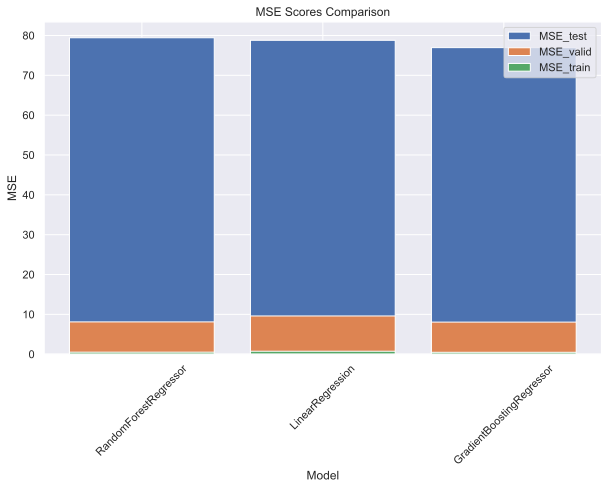

In [92]:
model_names = df_scores['Model']
mse_train = df_scores['MSE_train']
mse_valid = df_scores['MSE_valid']
mse_test = df_scores['MSE_test']

plt.figure(figsize=(10, 6))

plt.bar(model_names, mse_test, label='MSE_test')
plt.bar(model_names, mse_valid, label='MSE_valid')
plt.bar(model_names, mse_train, label='MSE_train')


plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Scores Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

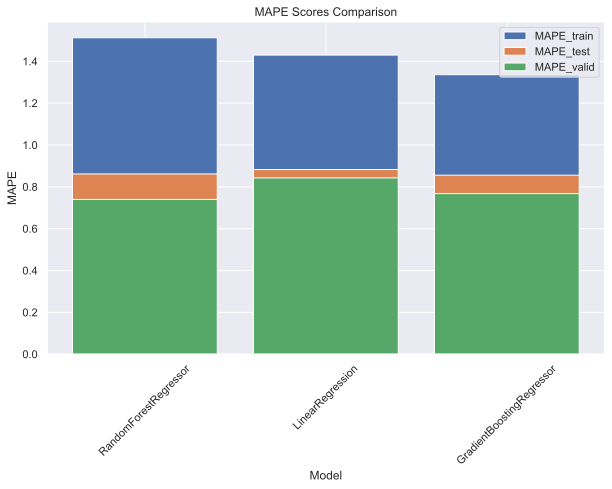

In [85]:
model_names = df_scores['Model']
mape_train = df_scores['MAPE_train']
mape_valid = df_scores['MAPE_valid']
mape_test = df_scores['MAPE_test']

plt.figure(figsize=(10, 6))
plt.bar(model_names, mape_train, label='MAPE_train')
plt.bar(model_names, mape_test, label='MAPE_test')
plt.bar(model_names, mape_valid, label='MAPE_valid')
plt.xlabel('Model')
plt.ylabel('MAPE')
plt.title('MAPE Scores Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.show()

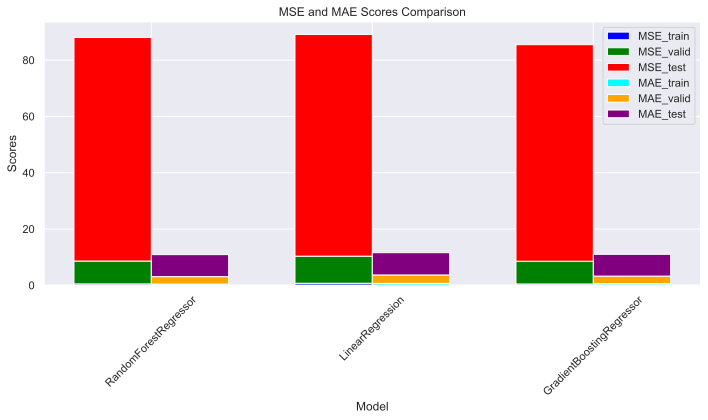

In [93]:
model_names = df_scores['Model']
mse_train = df_scores['MSE_train']
mse_valid = df_scores['MSE_valid']
mse_test = df_scores['MSE_test']
mae_train = df_scores['MAE_train']
mae_valid = df_scores['MAE_valid']
mae_test = df_scores['MAE_test']

bar_width = 0.35
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]

plt.figure(figsize=(10, 6))
plt.bar(r1, mse_train, color='blue', width=bar_width, edgecolor='white', label='MSE_train')
plt.bar(r1, mse_valid, color='green', width=bar_width, edgecolor='white', label='MSE_valid', bottom=mse_train)
plt.bar(r1, mse_test, color='red', width=bar_width, edgecolor='white', label='MSE_test', bottom=mse_train+mse_valid)
plt.bar(r2, mae_train, color='cyan', width=bar_width, edgecolor='white', label='MAE_train')
plt.bar(r2, mae_valid, color='orange', width=bar_width, edgecolor='white', label='MAE_valid', bottom=mae_train)
plt.bar(r2, mae_test, color='purple', width=bar_width, edgecolor='white', label='MAE_test', bottom=mae_train+mae_valid)

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('MSE and MAE Scores Comparison')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names, rotation=45)

plt.legend()
plt.tight_layout()
plt.show()

----

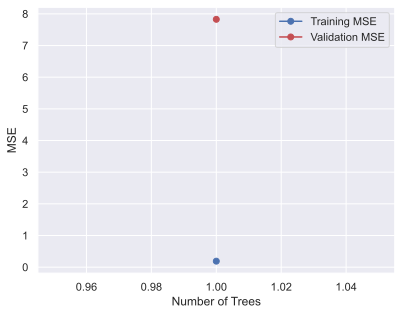

In [96]:
rf_model = RandomForestRegressor(n_estimators=50, min_samples_split=10)
rf_model.fit(X_train[features], y_train_normalized) #history = 

y_train_pred = rf_model.predict(X_train[features])
y_valid_pred = rf_model.predict(X_valid[features])

train_mse = mean_squared_error(y_train_normalized, y_train_pred)
valid_mse = mean_squared_error(y_valid_normalized, y_valid_pred)

plt.plot([1], [train_mse], 'b', marker='o', label='Training MSE')
plt.plot([1], [valid_mse], 'r', marker='o', label='Validation MSE')
plt.xlabel('Number of Trees')
plt.ylabel('MSE')
plt.legend()
plt.show()

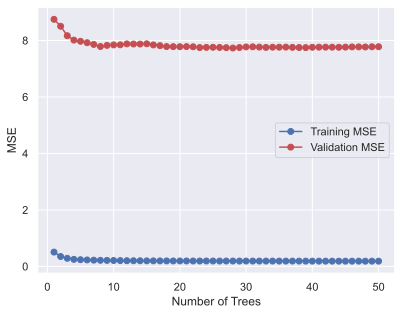

In [102]:
rf_model = RandomForestRegressor(n_estimators=50, min_samples_split=10)
history = rf_model.fit(X_train[features], y_train_normalized)

y_train_pred = rf_model.predict(X_train[features])
y_valid_pred = rf_model.predict(X_valid[features])

train_mse = mean_squared_error(y_train_normalized, y_train_pred)
valid_mse = mean_squared_error(y_valid_normalized, y_valid_pred)

num_trees = range(1, len(rf_model.estimators_) + 1)
train_mse_history = []
valid_mse_history = []

for i in num_trees:
    y_train_pred_stage = np.mean([est.predict(X_train[features]) for est in rf_model.estimators_[:i]], axis=0)
    y_valid_pred_stage = np.mean([est.predict(X_valid[features]) for est in rf_model.estimators_[:i]], axis=0)
    
    train_mse_history.append(mean_squared_error(y_train_normalized, y_train_pred_stage))
    valid_mse_history.append(mean_squared_error(y_valid_normalized, y_valid_pred_stage))

plt.plot(num_trees, train_mse_history, 'b', marker='o', label='Training MSE')
plt.plot(num_trees, valid_mse_history, 'r', marker='o', label='Validation MSE')
plt.xlabel('Number of Trees')
plt.ylabel('MSE')
plt.legend()
plt.show()

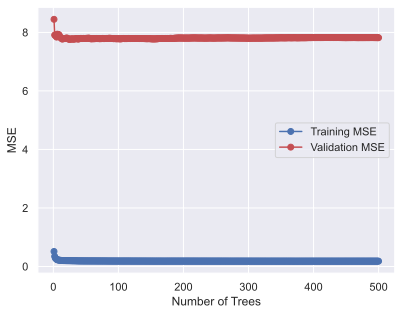

In [101]:
rf_model = RandomForestRegressor(n_estimators=500, min_samples_split=10)
history = rf_model.fit(X_train[features], y_train_normalized)

y_train_pred = rf_model.predict(X_train[features])
y_valid_pred = rf_model.predict(X_valid[features])

train_mse = mean_squared_error(y_train_normalized, y_train_pred)
valid_mse = mean_squared_error(y_valid_normalized, y_valid_pred)

num_trees = range(1, len(rf_model.estimators_) + 1)
train_mse_history = []
valid_mse_history = []

for i in num_trees:
    y_train_pred_stage = np.mean([est.predict(X_train[features]) for est in rf_model.estimators_[:i]], axis=0)
    y_valid_pred_stage = np.mean([est.predict(X_valid[features]) for est in rf_model.estimators_[:i]], axis=0)
    
    train_mse_history.append(mean_squared_error(y_train_normalized, y_train_pred_stage))
    valid_mse_history.append(mean_squared_error(y_valid_normalized, y_valid_pred_stage))

plt.plot(num_trees, train_mse_history, 'b', marker='o', label='Training MSE')
plt.plot(num_trees, valid_mse_history, 'r', marker='o', label='Validation MSE')
plt.xlabel('Number of Trees')
plt.ylabel('MSE')
plt.legend()
plt.show()

----

----

----

# cat val encoding

## one hot encoding

In [22]:
data = X_train

### color

In [23]:
encoded_colors = pd.get_dummies(data['color'], prefix='color')
data = pd.concat([data, encoded_colors], axis=1)
data.drop('color', axis=1, inplace=True)

### genres_split

In [24]:
data['genres'] = data['genres'].fillna('')
unique_genres = set()
for genres in data['genres']:
    unique_genres.update(genres.split('|'))
genre_columns = []
for genre in unique_genres:
    data[genre] = data['genres'].apply(lambda x: 1 if genre in x.split('|') else 0)
    genre_columns.append(genre)
data['genre_OOV'] = data['genres'].apply(lambda x: 1 if not any(genre in x.split('|') for genre in genre_columns) else 0)
data.drop('genres', axis=1, inplace=True)

### content_rating

In [25]:
unique_ratings = data['content_rating'].unique()
rating_columns = []
for rating in unique_ratings:
    data[f"rating_{rating}"] = data['content_rating'].apply(lambda x: 1 if x == rating else 0)
    rating_columns.append(f"rating_{rating}")
data['content_rating_OOV'] = data['content_rating'].apply(lambda x: 1 if x not in unique_ratings else 0)
#data.drop('content_rating', axis=1, inplace=True)

## Let's separate countries and languages in 2 categories

### country

In [26]:
data['USA'] = data['country'].apply(lambda x: 1 if x == 'USA' else 0)
data['not_USA'] = data['country'].apply(lambda x: 1 if x != 'USA' else 0)
data.drop('country', axis=1, inplace=True)

### language

In [27]:
data['English'] = data['language'].apply(lambda x: 1 if x == 'English' else 0)
data['not_English'] = data['language'].apply(lambda x: 1 if x != 'English' else 0)
data.drop('language', axis=1, inplace=True)

## Bucketing of director_name by budget

In [28]:
director_avg_budget = data.groupby('director_name')['budget'].mean()
num_buckets = 5
bucket_labels = [f'bucket {i+1}' for i in range(num_buckets)]
data['director_bucket'] = pd.qcut(data['director_name'].map(director_avg_budget), 
                                  q=num_buckets, labels=bucket_labels)

In [29]:
encoded_director = pd.get_dummies(data['director_bucket'], prefix='Director')
data = pd.concat([data, encoded_director], axis=1)

In [30]:
data.drop('director_bucket', axis=1, inplace=True)
data.drop('director_name', axis=1, inplace=True)

## Bucketing of actor_1_name by actor_1_fb_likes

In [31]:
actor_1_avg_likes = data.groupby('actor_1_name')['actor_1_facebook_likes'].mean()
num_buckets = 5
bucket_labels = [f'bucket {i+1}' for i in range(num_buckets)]
data['actor_1_bucket'] = pd.qcut(data['actor_1_name'].map(actor_1_avg_likes),
                                 q=num_buckets, labels=bucket_labels)

In [32]:
encoded_actor_1 = pd.get_dummies(data['actor_1_bucket'], prefix='Actor1')
data = pd.concat([data, encoded_actor_1], axis=1)

In [33]:
data.drop('actor_1_bucket', axis=1, inplace=True)
data.drop('actor_1_name', axis=1, inplace=True)

## Now let's prepare X_test

In [34]:
encoded_colors = pd.get_dummies(X_test['color'], prefix='color')
X_test = pd.concat([X_test, encoded_colors], axis=1)
X_test.drop('color', axis=1, inplace=True)

In [35]:
X_test['genres'] = X_test['genres'].fillna('')
for genre in genre_columns:
    X_test[genre] = X_test['genres'].apply(lambda x: 1 if genre in x.split('|') else 0)
X_test['genre_OOV'] = X_test['genres'].apply(lambda x: 1 if not any(genre in x.split('|') for 
                                                                    genre in genre_columns) else 0)
X_test.drop('genres', axis=1, inplace=True)

In [36]:
unique_ratings = data['content_rating'].unique()
for rating in rating_columns:
    if rating in X_test.columns:
        X_test[rating] = X_test['content_rating'].apply(lambda x: 1 if x == rating.split('_')[1] else 0)
X_test['content_rating_OOV'] = X_test['content_rating'].apply(lambda x: 1 if x not in unique_ratings else 0)
X_test.drop('content_rating', axis=1, inplace=True)

In [37]:
X_test['USA'] = X_test['country'].apply(lambda x: 1 if x == 'USA' else 0)
X_test['not_USA'] = X_test['country'].apply(lambda x: 1 if x != 'USA' else 0)
X_test.drop('country', axis=1, inplace=True)

In [38]:
X_test['English'] = X_test['language'].apply(lambda x: 1 if x == 'English' else 0)
X_test['not_English'] = X_test['language'].apply(lambda x: 1 if x != 'English' else 0)
X_test.drop('language', axis=1, inplace=True)

In [39]:
actor_1_avg_likes = X_test.groupby('actor_1_name')['actor_1_facebook_likes'].mean()
num_buckets = 5
bucket_labels = [f'bucket {i+1}' for i in range(num_buckets)]
X_test['actor_1_bucket'] = pd.qcut(X_test['actor_1_name'].map(actor_1_avg_likes),
                                 q=num_buckets, labels=bucket_labels)

In [40]:
encoded_actor_1 = pd.get_dummies(X_test['actor_1_bucket'], prefix='Actor1')
X_test = pd.concat([X_test, encoded_actor_1], axis=1)

In [41]:
director_avg_budget = X_test.groupby('director_name')['budget'].mean()
num_buckets = 5
bucket_labels = [f'bucket {i+1}' for i in range(num_buckets)]
X_test['director_bucket'] = pd.qcut(X_test['director_name'].map(director_avg_budget), 
                                  q=num_buckets, labels=bucket_labels)

In [42]:
encoded_director = pd.get_dummies(X_test['director_bucket'], prefix='Director')
X_test = pd.concat([X_test, encoded_director], axis=1)

In [43]:
X_test.drop('director_bucket', axis=1, inplace=True)
X_test.drop('director_name', axis=1, inplace=True)

In [44]:
X_test.drop('actor_1_bucket', axis=1, inplace=True)
X_test.drop('actor_1_name', axis=1, inplace=True)

In [45]:
data.drop('content_rating', axis=1, inplace=True)

In [46]:
def remove_unknown_tokens(data, known_tokens, oov_token):
    data_encoded = data.copy()
    unknown_tokens = set(data.columns) - set(known_tokens)
    missing_tokens = set(known_tokens) - set(data.columns)
    data_encoded.loc[:, unknown_tokens] = oov_token
    data_encoded.loc[:, missing_tokens] = 0
    return data_encoded[known_tokens]

known_tokens = list(data.columns)

oov_token = -1

data_encoded = remove_unknown_tokens(data, known_tokens, oov_token)
X_test_encoded = remove_unknown_tokens(X_test, known_tokens, oov_token)

print("X_train before encoding: \n", data.columns)
print("\n X_test before encoding: \n", X_test.columns)
print("\n X_train after encoding: \n", data_encoded.columns)
#print("\n X_test after encoding: \n", X_test_encoded.columns)

X_train before encoding: 
 Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users',
       'cast_total_facebook_likes', 'num_user_for_reviews', 'budget',
       'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'color_Black and White', 'color_Color',
       'Mystery', 'Animation', 'Western', 'Music', 'News', 'Thriller',
       'Horror', 'Biography', 'Fantasy', 'Romance', 'Film-Noir', 'Musical',
       'Short', 'Drama', 'Comedy', 'History', 'Crime', 'Sci-Fi', 'Documentary',
       'Family', 'Sport', 'War', 'Adventure', 'Action', 'genre_OOV',
       'rating_R', 'rating_PG-13', 'rating_Not Rated', 'rating_PG',
       'rating_Approved', 'rating_G', 'rating_NC-17', 'content_rating_OOV',
       'USA', 'not_USA', 'English', 'not_English', 'Director_bucket 1',
       'Director_bucket 2', 'Director_bucket 3', 'Director_bucket 4',
       'Director_bucket 5', 'Actor1_buc

 drop out -> 
 'actor_3_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 
 'num_voted_users',  'num_user_for_reviews'

### Let's drop out some columns

In [47]:
train_data_1 = data_encoded

In [48]:
test_data_1 = X_test_encoded

In [49]:
train_data_1.drop('actor_3_facebook_likes', axis=1, inplace=True)

In [50]:
test_data_1.drop('actor_3_facebook_likes', axis=1, inplace=True)

In [51]:
train_data_1.drop('actor_2_facebook_likes', axis=1, inplace=True)

In [52]:
test_data_1.drop('actor_2_facebook_likes', axis=1, inplace=True)

In [53]:
train_data_1.drop('actor_1_facebook_likes', axis=1, inplace=True)

In [54]:
test_data_1.drop('actor_1_facebook_likes', axis=1, inplace=True)

In [55]:
train_data_1.drop('num_voted_users', axis=1, inplace=True)

In [56]:
test_data_1.drop('num_voted_users', axis=1, inplace=True)

In [57]:
train_data_1.drop('num_user_for_reviews', axis=1, inplace=True)

In [58]:
test_data_1.drop('num_user_for_reviews', axis=1, inplace=True)

## Building a model

### RF Regressor

In [91]:
features = ['budget', 'imdb_score', 'USA', 'English']#['num_critic_for_reviews', 'duration', 'budget', 'imdb_score', 'USA', 'English']

In [94]:
regression_model = RandomForestRegressor(n_estimators=500) 
regression_model.fit(train_data_1[features], y_train)

RandomForestRegressor(n_estimators=500)

In [95]:
y_pred = regression_model.predict(test_data_1[features])

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 3.809420996022108e+16
Mean Absolute Error (MAE): 172116691.89874262
Mean Absolute Percentage Error (MAPE): 0.7934381053800925
R-squared Score: -3.6140034418833


### XGB Regressor

In [81]:
regression_model = xgb.XGBRFRegressor(n_estimators=50, learning_rate=0.9, subsample=0.8, colsample_bynode=0.8, reg_lambda=1e-9)
regression_model.fit(train_data_1, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.9, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=50, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None, ...)

In [82]:
y_pred = regression_model.predict(test_data_1)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 3.781316596688774e+16
Mean Absolute Error (MAE): 172986887.22639224
Mean Absolute Percentage Error (MAPE): 0.8024005654765338
R-squared Score: -3.5799631519307127


## TRied to make it better, but tired of waiting

param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],  # [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

regression_model = RandomForestRegressor()

grid_search = GridSearchCV(regression_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(data_encoded, y_train)

best_regression_model = grid_search.best_estimator_

best_regression_model.fit(data_encoded, y_train)

mse_scores = cross_val_score(best_regression_model, data_encoded, 
                             y_train, scoring='neg_mean_squared_error', cv=5)
mse_mean = -mse_scores.mean()

y_pred = best_regression_model.predict(X_test_encoded)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared Score:", r2)

param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bynode': [0.8, 0.9, 1.0],
    'reg_lambda': [1e-5, 1e-4, 1e-3]
}

regression_model = xgb.XGBRFRegressor()

grid_search = GridSearchCV(regression_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(data_encoded, y_train)

best_regression_model = grid_search.best_estimator_

best_regression_model.fit(data_encoded, y_train)

mse_scores = cross_val_score(best_regression_model, data_encoded, y_train, scoring='neg_mean_squared_error', cv=5)
mse_mean = -mse_scores.mean()

y_pred = best_regression_model.predict(X_test_encoded)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 5.066125921522722e+16
Mean Absolute Error (MAE): 205987429.9751816
Mean Absolute Percentage Error (MAPE): 0.9770687195402262
R-squared Score: -5.136135245573781

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bynode': [0.8, 0.9, 1.0],
    'reg_lambda': [1e-5, 1e-4, 1e-3]
}

regression_model = xgb.XGBRFRegressor()

grid_search = GridSearchCV(regression_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(data_encoded, y_train)

best_regression_model = grid_search.best_estimator_

best_regression_model.fit(data_encoded, y_train)

mse_scores = cross_val_score(best_regression_model, data_encoded, y_train, scoring='neg_mean_squared_error', cv=5)
mse_mean = -mse_scores.mean()

y_pred = best_regression_model.predict(X_test_encoded)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 5.06617276369964e+16
Mean Absolute Error (MAE): 205990957.03177965
Mean Absolute Percentage Error (MAPE): 0.9770913413548851
R-squared Score: -5.136191981220946

param_grid = {
    'n_estimators': [100, 300, 1000],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bynode': [0.8, 0.9, 1.0],
    'reg_lambda': [1e-5, 1e-4, 1e-3]
}

regression_model = xgb.XGBRFRegressor()

grid_search = GridSearchCV(regression_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(data_encoded, y_train)

best_regression_model = grid_search.best_estimator_

best_regression_model.fit(data_encoded, y_train)

mse_scores = cross_val_score(best_regression_model, data_encoded, y_train, scoring='neg_mean_squared_error', cv=5)
mse_mean = -mse_scores.mean()

y_pred = best_regression_model.predict(X_test_encoded)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 5.066095895413197e+16
Mean Absolute Error (MAE): 205987068.51846248
Mean Absolute Percentage Error (MAPE): 0.9770667590316227
R-squared Score: -5.136098877691934